In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [2]:
output_data = pd.read_csv("Data Files/Output Data Clean.csv")

In [3]:
output_data['Population Density'] = output_data['Population']/output_data['Land Area']
output_data['Total Crime'] = output_data['Violent Crime'] + output_data['Property Crime']
output_data['Citizens per Officer'] = output_data['Population']/output_data['Total Officers']
output_data['Officer Density'] = output_data['Total Officers'] / output_data['Land Area']
output_data['Total Crime Rate'] = output_data['Total Crime'] / output_data['Population'] * 100000
output_data.head()

,County,County Type,Violent Crime,Murder And Nonnegligent Manslaughter,Forcible Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny- Theft,Motor Vehicle Theft,Total Officers,Population,Land Area,Population Density,Total Crime,Citizens per Officer,Officer Density,Total Crime Rate
0,Alameda,Metropolitan,10308,132,519,4767,4890,47547,11708,26822,9017,2751,1510271,739,2043.668471,57855,548.989822,3.722598,3830.769445
1,Butte,Metropolitan,751,7,89,153,502,5464,1826,3265,373,260,220000,1636,134.474328,6215,846.153846,0.158924,2825.000000
2,Contra Costa,Metropolitan,4257,65,187,1525,2480,28491,7546,15494,5451,1612,1049025,715,1467.167832,32748,650.759926,2.254545,3121.755916
3,El Dorado,Metropolitan,485,3,34,66,382,2614,1112,1460,42,230,181058,1707,106.067955,3099,787.208696,0.134739,1711.606226
4,Fresno,Metropolitan,4904,63,181,1358,3302,38442,8982,22680,6780,1793,930450,5957,156.194393,43346,518.934746,0.300990,4658.606051


In [15]:
crime_data = output_data.iloc[:,0:11]
crime_rates = crime_data.iloc[:,0:2]
crime_rates['Population'] = output_data['Population']
crime_rates['Population Density'] = output_data['Population Density']
crime_rates['Citizens per Officer'] = output_data['Citizens per Officer']
crime_rates['Officer Density'] = output_data['Officer Density']
crime_rates['Total Crime Rate'] = output_data['Total Crime Rate']

for item in crime_data.iloc[:,2:11].columns:
    c_rate = crime_data[item] / output_data['Population'] * 100000
    crime_rates[f'{item} Rate'] = c_rate
    
# crime_rates = crime_rates.loc[crime_rates['County'] != 'San Francisco']
# crime_rates = crime_rates.loc[crime_rates['County'] != 'Los Angeles']
# crime_rates = crime_rates.loc[crime_rates['County'] != 'Orange']
crime_rates = crime_rates.loc[crime_rates['County Type'] == 'Metropolitan']
crime_rates.reset_index(inplace=True, drop=True)

crime_rates.sort_values(by='Population Density').head()

,County,County Type,Population,Population Density,Citizens per Officer,Officer Density,Total Crime Rate,Violent Crime Rate,Murder And Nonnegligent Manslaughter Rate,Forcible Rape Rate,Robbery Rate,Aggravated Assault Rate,Property Crime Rate,Burglary Rate,Larceny- Theft Rate,Motor Vehicle Theft Rate
18,San Benito,Metropolitan,55269,39.819164,665.891566,0.059798,2600.010856,383.578498,1.809333,23.521323,63.326639,294.921204,2216.432358,1004.179558,1033.128879,179.123921
5,Imperial,Metropolitan,174528,41.793103,520.979104,0.080220,3596.557572,354.097910,1.718922,14.897323,60.162266,277.319399,3242.459663,1069.742391,1779.657132,393.060139
28,Shasta,Metropolitan,177223,46.946490,676.423664,0.069404,3417.727947,819.306749,1.692783,67.711302,77.867997,672.034668,2598.421198,850.341096,1583.315935,164.764167
9,Madera,Metropolitan,150865,70.596631,1026.292517,0.068788,2435.289829,433.500149,6.628443,32.479369,85.506910,308.885427,2001.789680,794.087429,977.695290,230.006960
23,San Luis Obispo,Metropolitan,269637,81.757732,783.828488,0.104306,2377.270182,241.435708,2.225214,30.040388,34.119946,175.050160,2135.834474,555.932606,1505.728071,74.173797


# Charts of Types of Crime vs Population Density and Citizens per Officer

## Total Crime

<IPython.core.display.Javascript object>


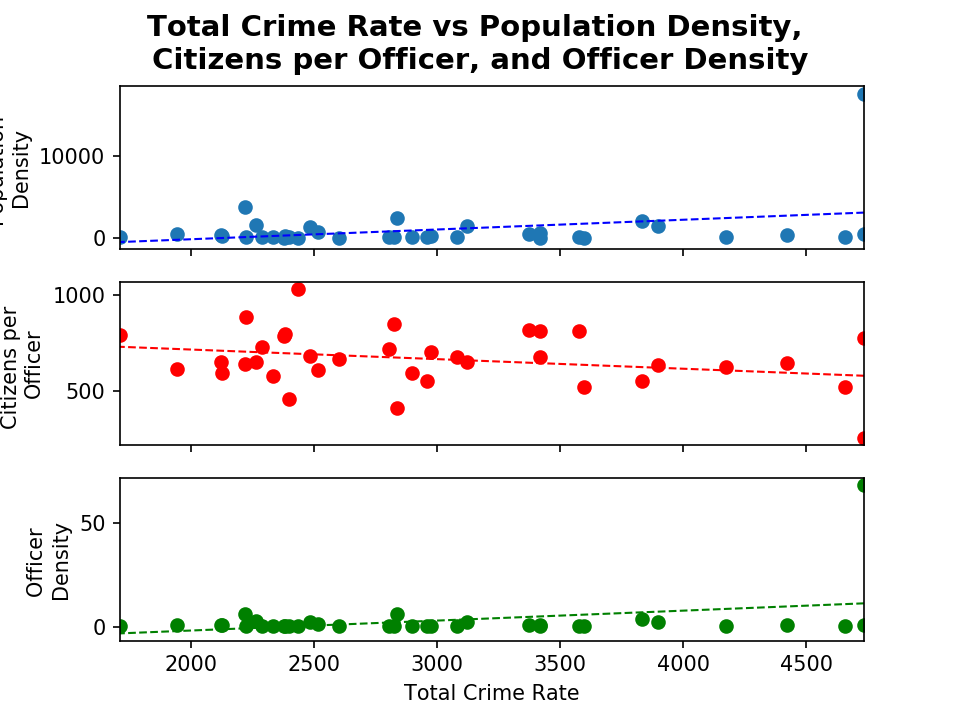

The correlation between Total Crime Rate and Population Density is 0.33352569497885803
The correlation between Total Crime Rate and Citizens per Officer is -0.28885987233133703
The correlation between Total Crime Rate and Officer Density is 0.35198033948499785


In [5]:
crime_df = crime_rates.iloc[:,[0,1,2,3,4,5,6]].sort_values(by='Total Crime Rate', ascending=False).reset_index(drop=True)

popdense = crime_df['Population Density']
officers = crime_df['Citizens per Officer']
offdense = crime_df['Officer Density']
crime_rate = crime_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{crime_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=14, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(crime_df.columns[6])

print(f'The correlation between {crime_df.columns[6]} and {crime_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {crime_df.columns[6]} and {crime_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {crime_df.columns[6]} and {crime_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Violent Crime

<IPython.core.display.Javascript object>


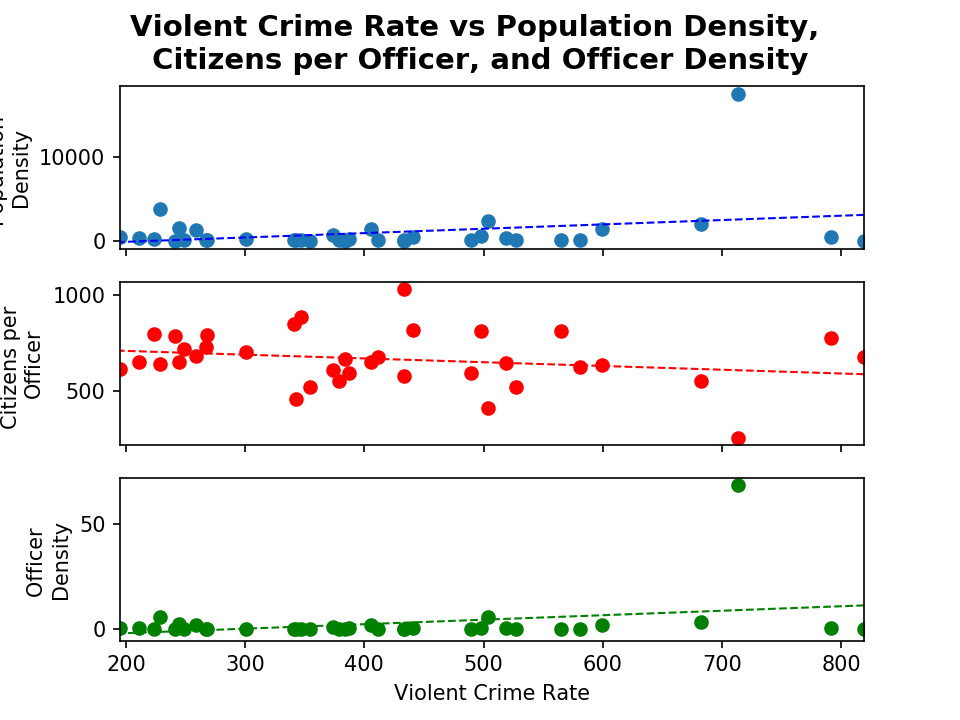

The correlation between Violent Crime Rate and Population Density is 0.28982076145220464
The correlation between Violent Crime Rate and Citizens per Officer is -0.22501157701449878
The correlation between Violent Crime Rate and Officer Density is 0.3087522389915269


In [6]:
violent_df = crime_rates.iloc[:,[0,1,2,3,4,5,7]].sort_values(by='Violent Crime Rate', ascending=False).reset_index(drop=True)

popdense = violent_df['Population Density']
officers = violent_df['Citizens per Officer']
offdense = violent_df['Officer Density']
crime_rate = violent_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{violent_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=14, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(violent_df.columns[6])

print(f'The correlation between {violent_df.columns[6]} and {violent_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {violent_df.columns[6]} and {violent_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {violent_df.columns[6]} and {violent_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Murder and Nonnegligent Manslaughter

<IPython.core.display.Javascript object>


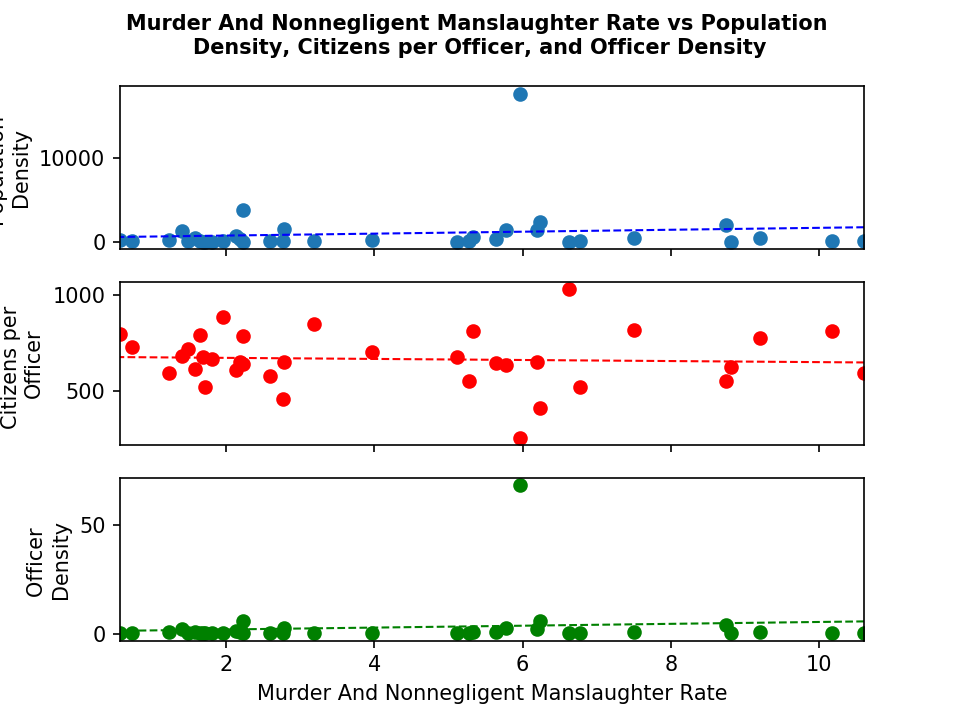

The correlation between Murder And Nonnegligent Manslaughter Rate and Population Density is 0.1129297438254318
The correlation between Murder And Nonnegligent Manslaughter Rate and Citizens per Officer is -0.05635169338195847
The correlation between Murder And Nonnegligent Manslaughter Rate and Officer Density is 0.11083240631182395


In [7]:
murder_df = crime_rates.iloc[:,[0,1,2,3,4,5,8]].sort_values(by='Murder And Nonnegligent Manslaughter Rate',
                                                          ascending=False).reset_index(drop=True)

popdense = murder_df['Population Density']
officers = murder_df['Citizens per Officer']
offdense = murder_df['Officer Density']
crime_rate = murder_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{murder_df.columns[6]} vs Population \nDensity, Citizens per Officer, and Officer Density', fontsize=10, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(murder_df.columns[6])

print(f'The correlation between {murder_df.columns[6]} and {murder_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {murder_df.columns[6]} and {murder_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {murder_df.columns[6]} and {murder_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Forcible Rape

<IPython.core.display.Javascript object>


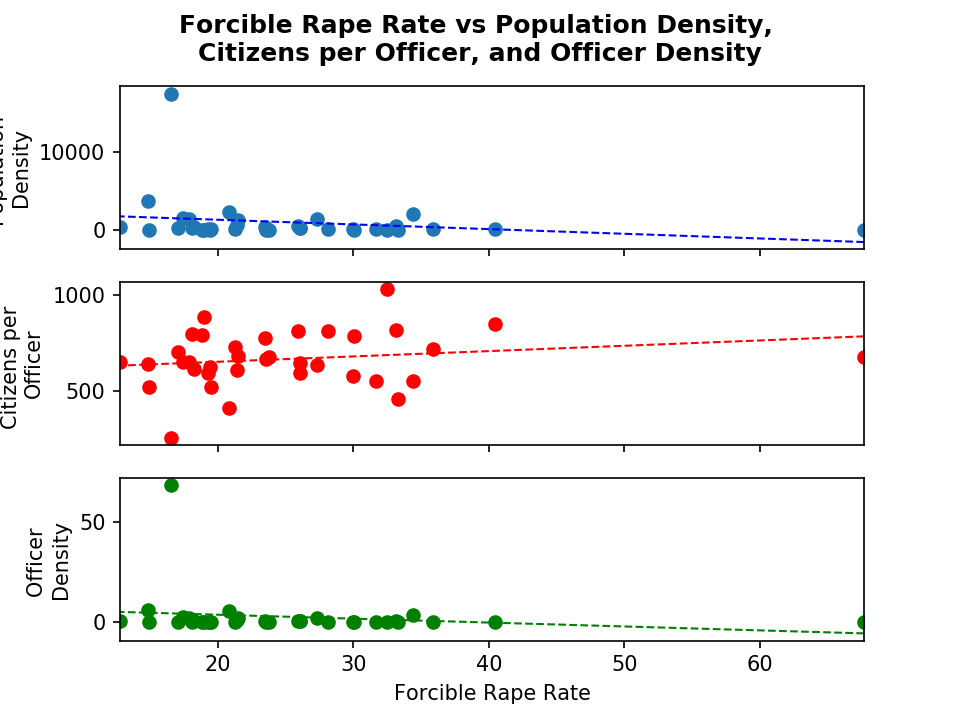

The correlation between Forcible Rape Rate and Population Density is -0.2038739952984625
The correlation between Forcible Rape Rate and Citizens per Officer is 0.19333257374209095
The correlation between Forcible Rape Rate and Officer Density is -0.17186436298786278


In [8]:
rape_df = crime_rates.iloc[:,[0,1,2,3,4,5,9]].sort_values(by='Forcible Rape Rate', ascending=False).reset_index(drop=True)

popdense = rape_df['Population Density']
officers = rape_df['Citizens per Officer']
offdense = rape_df['Officer Density']
crime_rate = rape_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{rape_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(rape_df.columns[6])

print(f'The correlation between {rape_df.columns[6]} and {rape_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {rape_df.columns[6]} and {rape_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {rape_df.columns[6]} and {rape_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Robbery

<IPython.core.display.Javascript object>


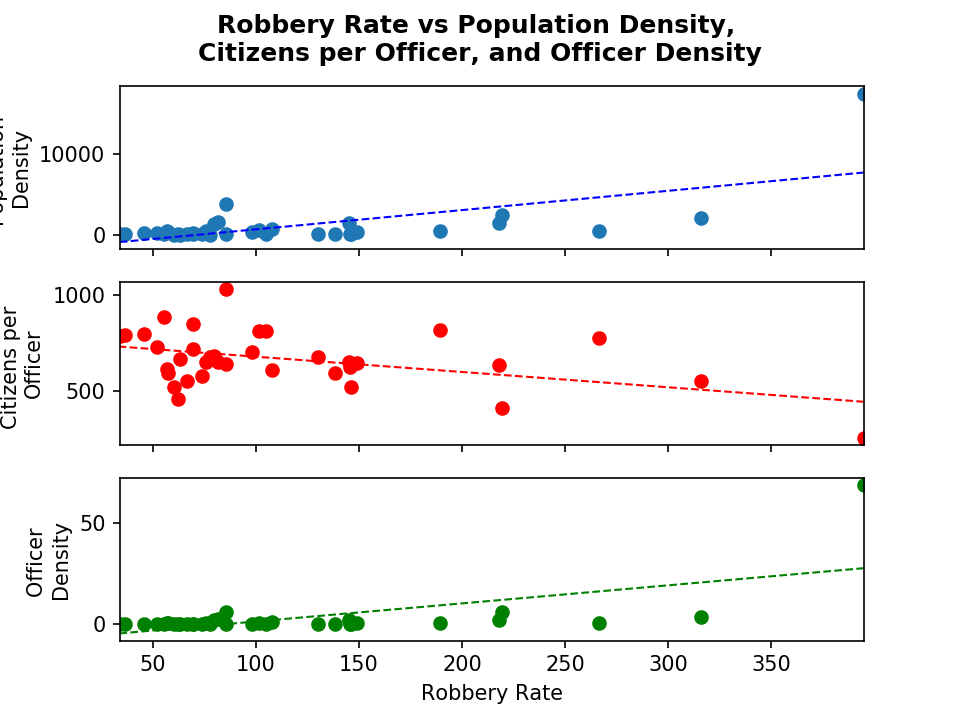

The correlation between Robbery Rate and Population Density is 0.6592400928972403
The correlation between Robbery Rate and Citizens per Officer is -0.44953014631026017
The correlation between Robbery Rate and Officer Density is 0.6338271298735951


In [9]:
robbery_df = crime_rates.iloc[:,[0,1,2,3,4,5,10]].sort_values(by='Robbery Rate', ascending=False).reset_index(drop=True)

popdense = robbery_df['Population Density']
officers = robbery_df['Citizens per Officer']
offdense = robbery_df['Officer Density']
crime_rate = robbery_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{robbery_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(robbery_df.columns[6])

print(f'The correlation between {robbery_df.columns[6]} and {robbery_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {robbery_df.columns[6]} and {robbery_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {robbery_df.columns[6]} and {robbery_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Aggravated Assault

<IPython.core.display.Javascript object>


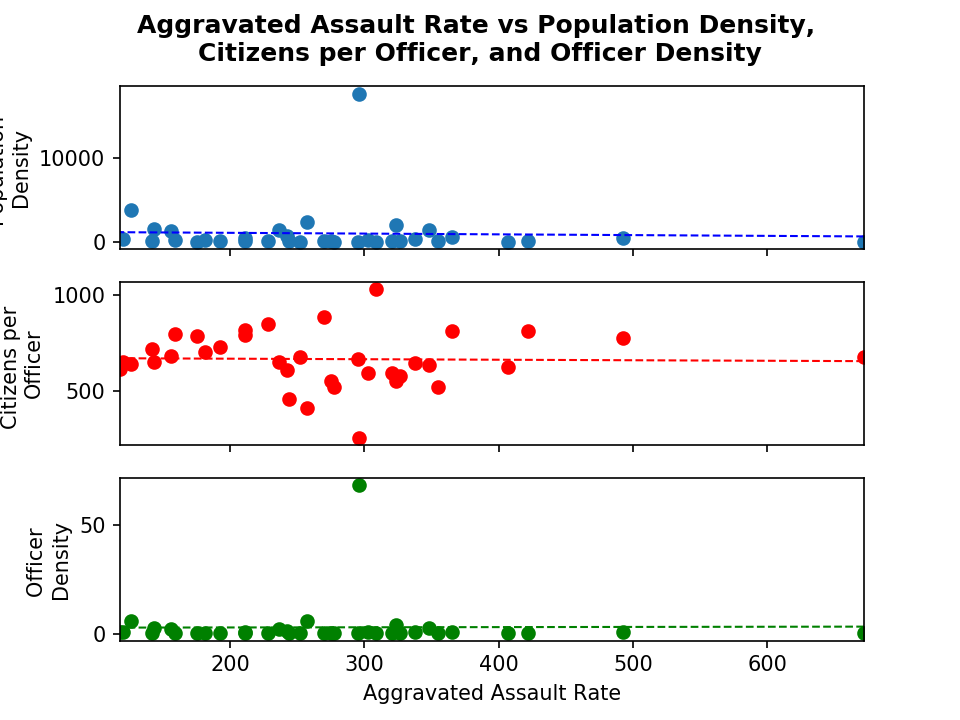

The correlation between Aggravated Assault Rate and Population Density is -0.03465298554648681
The correlation between Aggravated Assault Rate and Citizens per Officer is -0.02138232762089674
The correlation between Aggravated Assault Rate and Officer Density is 0.008141242700332747


In [10]:
assault_df = crime_rates.iloc[:,[0,1,2,3,4,5,11]].sort_values(by='Aggravated Assault Rate', ascending=False).reset_index(drop=True)

popdense = assault_df['Population Density']
officers = assault_df['Citizens per Officer']
offdense = assault_df['Officer Density']
crime_rate = assault_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{assault_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(assault_df.columns[6])

print(f'The correlation between {assault_df.columns[6]} and {assault_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {assault_df.columns[6]} and {assault_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {assault_df.columns[6]} and {assault_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Property Crime

<IPython.core.display.Javascript object>


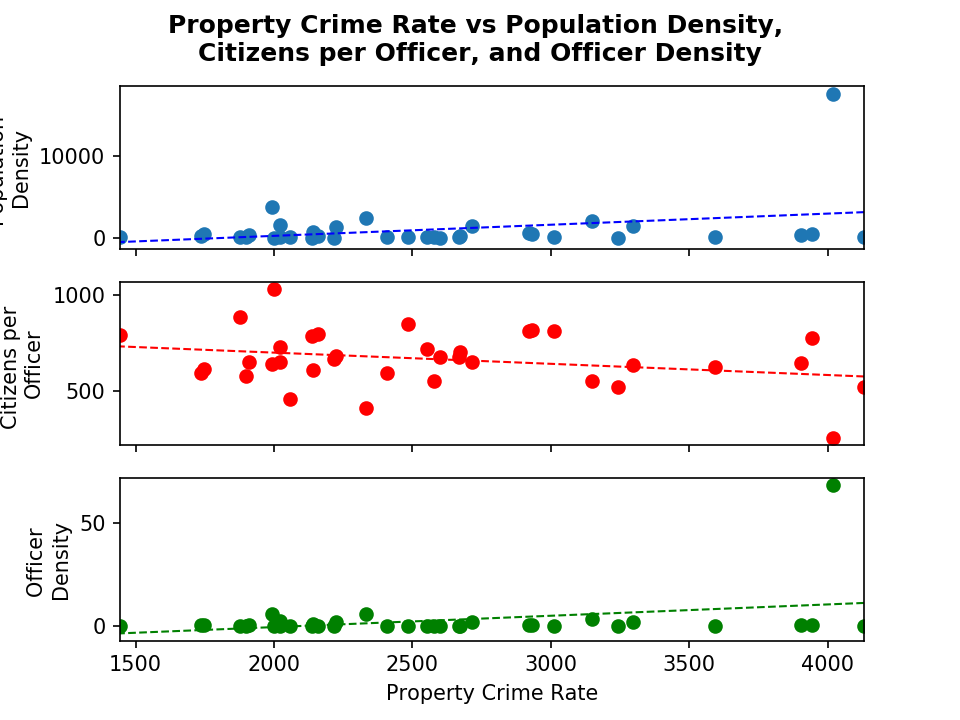

The correlation between Property Crime Rate and Population Density is 0.3242910502034288
The correlation between Property Crime Rate and Citizens per Officer is -0.28692358295431675
The correlation between Property Crime Rate and Officer Density is 0.3415596600361271


In [11]:
property_df = crime_rates.iloc[:,[0,1,2,3,4,5,12]].sort_values(by='Property Crime Rate', ascending=False).reset_index(drop=True)

popdense = property_df['Population Density']
officers = property_df['Citizens per Officer']
offdense = property_df['Officer Density']
crime_rate = property_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{property_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(property_df.columns[6])

print(f'The correlation between {property_df.columns[6]} and {property_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {property_df.columns[6]} and {property_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {property_df.columns[6]} and {property_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Burglary

<IPython.core.display.Javascript object>


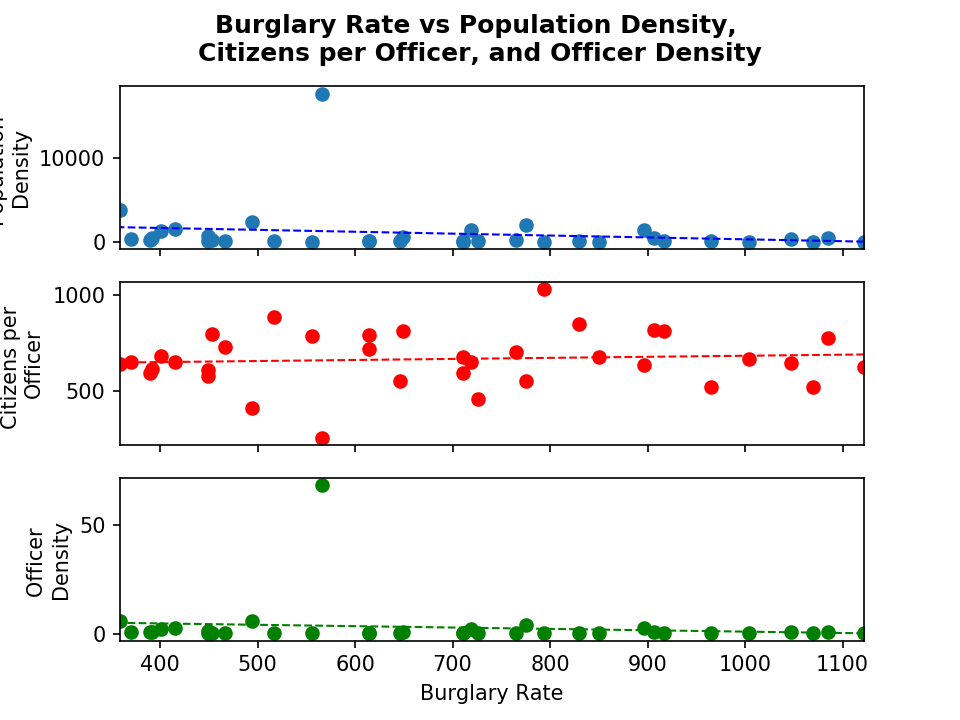

The correlation between Burglary Rate and Population Density is -0.17645187782834423
The correlation between Burglary Rate and Citizens per Officer is 0.08925222613225822
The correlation between Burglary Rate and Officer Density is -0.12914787982029366


In [12]:
burglary_df = crime_rates.iloc[:,[0,1,2,3,4,5,13]].sort_values(by='Burglary Rate', ascending=False).reset_index(drop=True)

popdense = burglary_df['Population Density']
officers = burglary_df['Citizens per Officer']
offdense = burglary_df['Officer Density']
crime_rate = burglary_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{burglary_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(burglary_df.columns[6])

print(f'The correlation between {burglary_df.columns[6]} and {burglary_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {burglary_df.columns[6]} and {burglary_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {burglary_df.columns[6]} and {burglary_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Larceny - Theft

<IPython.core.display.Javascript object>


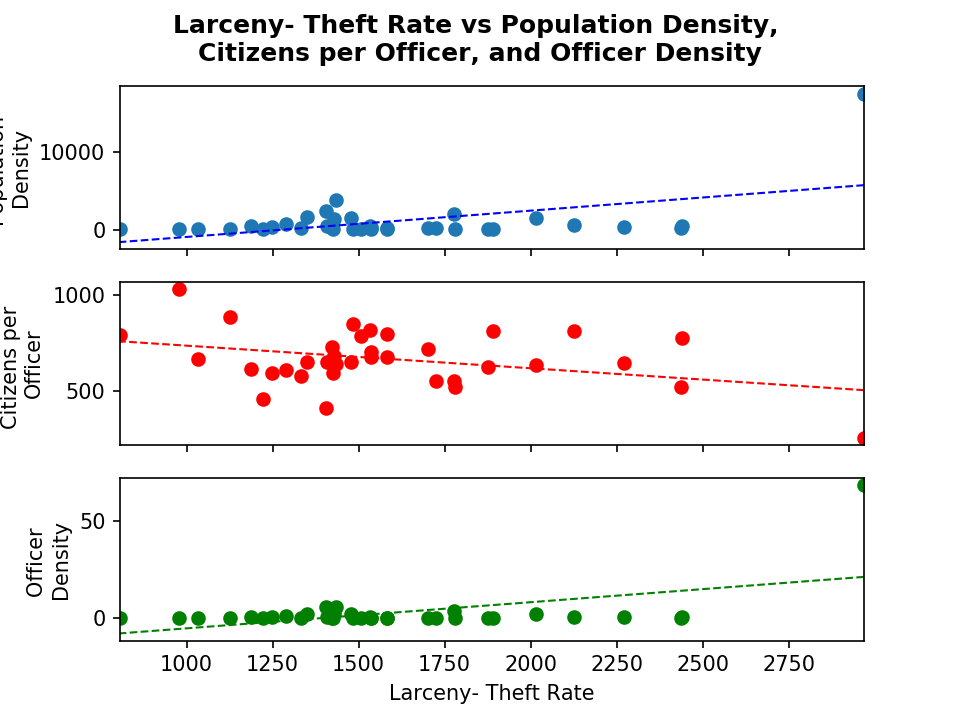

The correlation between Larceny- Theft Rate and Population Density is 0.5131821884309666
The correlation between Larceny- Theft Rate and Citizens per Officer is -0.3647526527924177
The correlation between Larceny- Theft Rate and Officer Density is 0.5258077514472174


In [13]:
larceny_df = crime_rates.iloc[:,[0,1,2,3,4,5,14]].sort_values(by='Larceny- Theft Rate', ascending=False).reset_index(drop=True)

popdense = larceny_df['Population Density']
officers = larceny_df['Citizens per Officer']
offdense = larceny_df['Officer Density']
crime_rate = larceny_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{larceny_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(larceny_df.columns[6])

print(f'The correlation between {larceny_df.columns[6]} and {larceny_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {larceny_df.columns[6]} and {larceny_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {larceny_df.columns[6]} and {larceny_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')

## Motor Vehicle Theft

<IPython.core.display.Javascript object>


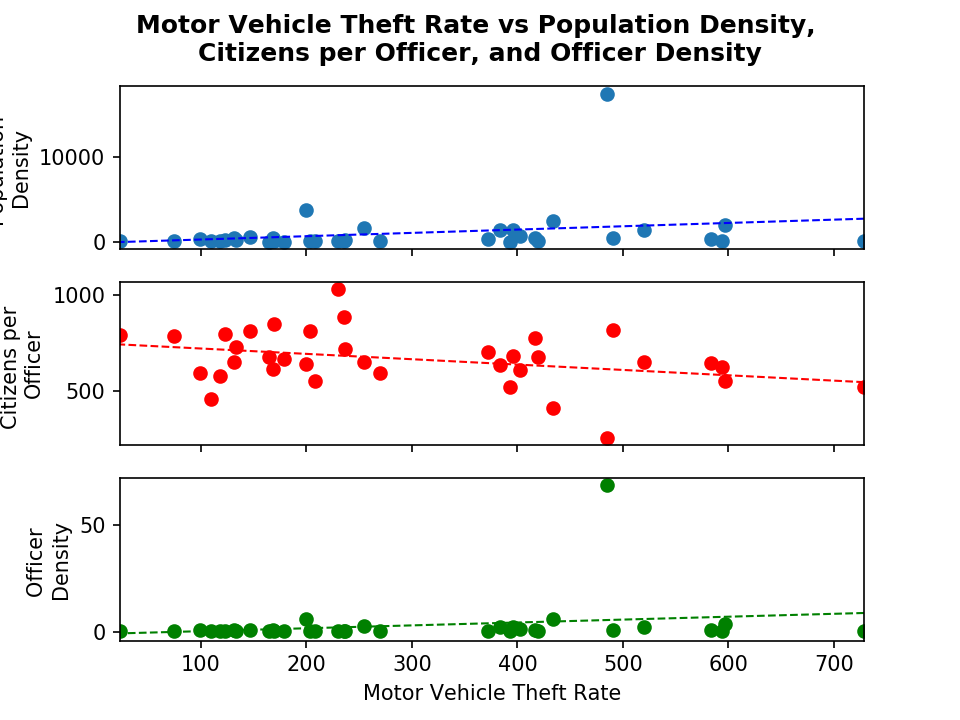

The correlation between Motor Vehicle Theft Rate and Population Density is 0.23646608233124566
The correlation between Motor Vehicle Theft Rate and Citizens per Officer is -0.34511671088970886
The correlation between Motor Vehicle Theft Rate and Officer Density is 0.21162683301729832


In [14]:
vehicle_theft_df = crime_rates.iloc[:,[0,1,2,3,4,5,15]].sort_values(by='Motor Vehicle Theft Rate', ascending=False).reset_index(drop=True)

popdense = vehicle_theft_df['Population Density']
officers = vehicle_theft_df['Citizens per Officer']
offdense = vehicle_theft_df['Officer Density']
crime_rate = vehicle_theft_df.iloc[:,6]

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(
   crime_rate, popdense) 
p_fit = p_slope * crime_rate + p_int

o_slope, o_int, o_r, o_p, o_std_err = stats.linregress(
   crime_rate, officers) 
o_fit = o_slope * crime_rate + o_int

od_slope, od_int, od_r, od_p, od_std_err = stats.linregress(
   crime_rate, offdense) 
od_fit = od_slope * crime_rate + od_int

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle(f'{vehicle_theft_df.columns[6]} vs Population Density, \nCitizens per Officer, and Officer Density', fontsize=12, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, popdense, linewidth=0, marker="o")
ax1.plot(crime_rate, p_fit, "b--", linewidth=1)
ax1.set_ylabel("Population \nDensity")

ax2.plot(crime_rate, officers, linewidth=0, marker="o", color="r")
ax2.plot(crime_rate, o_fit, "r--", linewidth=1)
ax2.set_ylabel("Citizens per \nOfficer")

ax3.plot(crime_rate, offdense, linewidth=0, marker="o", color="g")
ax3.plot(crime_rate, od_fit, "g--", linewidth=1)
ax3.set_ylabel("Officer \nDensity")
ax3.set_xlabel(vehicle_theft_df.columns[6])

print(f'The correlation between {vehicle_theft_df.columns[6]} and {vehicle_theft_df.columns[3]} is {np.corrcoef(crime_rate, popdense)[0][1]}')
print(f'The correlation between {vehicle_theft_df.columns[6]} and {vehicle_theft_df.columns[4]} is {np.corrcoef(crime_rate, officers)[0][1]}')
print(f'The correlation between {vehicle_theft_df.columns[6]} and {vehicle_theft_df.columns[5]} is {np.corrcoef(crime_rate, offdense)[0][1]}')